In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame(data={'col1' : [0, np.nan, 2, 3, 4, np.nan, np.nan],
                        'col2' : [100, 500, 200, 300, 400, 600, 800]})
df

col1  col2
0   0.0   100
1   NaN   500
2   2.0   200
3   3.0   300
4   4.0   400
5   NaN   600
6   NaN   800

In [3]:
df.isnull()

col1   col2
0  False  False
1   True  False
2  False  False
3  False  False
4  False  False
5   True  False
6   True  False

In [4]:
df.isnull().sum()

col1    3
col2    0
dtype: int64

In [5]:
df.fillna(method='pad',limit=2)

col1  col2
0   0.0   100
1   0.0   500
2   2.0   200
3   3.0   300
4   4.0   400
5   4.0   600
6   4.0   800

In [6]:
df = pd.DataFrame(data = {'col1': [np.nan, -np.inf, 2, 3, 4, np.inf, np.nan],
                          'col2': [1, -np.inf, 2, 3, 4, 6, 8]})
df

col1      col2
0       NaN  1.000000
1      -inf      -inf
2  2.000000  2.000000
3  3.000000  3.000000
4  4.000000  4.000000
5       inf  6.000000
6       NaN  8.000000

In [8]:
df.isna().sum()

col1    2
col2    0
dtype: int64

In [9]:
cars_data = pd.read_csv('cars.csv')

cars_data.sample(5)

Model   MPG Cylinders  Displacement  Horsepower  Weight  \
319         toyota corolla  32.2         4         108.0          75    2265   
227  pontiac grand prix lj  16.0         8         400.0         180    4220   
187            amc matador  15.5         8         304.0         120    3962   
389        ford mustang gl  27.0         4         140.0          86    2790   
7        plymouth fury iii   NaN         8         440.0         215    4312   

     Acceleration       Year Origin  bore  stroke  compression-ratio  
319          15.2       1980  Japan  2.97    3.23                9.4  
227          11.1       1977     US  3.62    3.15                7.5  
187          13.9       1976     US  3.01    3.40               23.0  
389          15.6  1982-1985     US  3.15    3.29                9.4  
7             8.5       1970     US  3.19    3.40                8.5

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

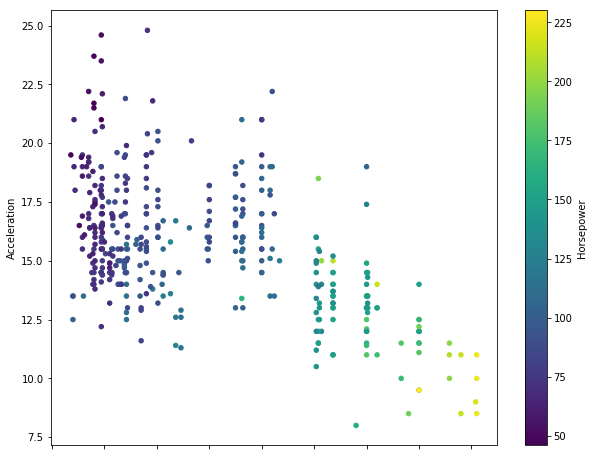

In [13]:
cars_data.plot.scatter(x='Displacement',
                      y='Acceleration',
                      c='Horsepower',
                      colormap='viridis',
                      figsize=(10,8));

In [14]:
cars_data.columns

Index(['Model', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Year', 'Origin', 'bore', 'stroke',
       'compression-ratio'],
      dtype='object')

In [15]:
cars_data['MPG'] = cars_data['MPG'].fillna(cars_data['MPG'].mean())

In [18]:
cars_data.isnull().sum()

Model                0
MPG                  0
Cylinders            0
Displacement         0
Horsepower           0
Weight               0
Acceleration         0
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    0
dtype: int64

In [19]:
to_drop = ['bore',
          'stroke',
          'compression-ratio']

In [22]:
to_drop

['bore', 'stroke', 'compression-ratio']

In [23]:
to_drop = [ 'bore',
            'stroke',
            'compression-ratio']

In [24]:
cars_data.drop(to_drop, inplace=True, axis=1)
cars_data.head()

KeyError: "['bore' 'stroke' 'compression-ratio'] not found in axis"

In [25]:
cars_data.columns

Index(['Model', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Year', 'Origin'],
      dtype='object')

In [26]:
cars_data.head()

Model   MPG Cylinders  Displacement  Horsepower  \
0  chevrolet chevelle malibu  18.0         8         307.0         130   
1          buick skylark 320  15.0         8         350.0         165   
2         plymouth satellite  18.0         8         318.0         150   
3              amc rebel sst  16.0         8         304.0         150   
4                ford torino  17.0         8         302.0         140   

   Weight  Acceleration        Year                 Origin  
0    3504          12.0  1970[1975]  US; Detroit, Michigan  
1    3693          11.5        1970                    US]  
2    3436          11.0  1970, 1976                     US  
3    3433          12.0        1970                     US  
4    3449          10.5   1970-1972                    US]

In [27]:
cars_data.dtypes

Model            object
MPG             float64
Cylinders        object
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration    float64
Year             object
Origin           object
dtype: object

In [28]:
cars_data['Year'].str.isnumeric().value_counts()

True     357
False     37
Name: Year, dtype: int64

In [30]:
cars_data['Year'].loc[cars_data['Year'].str.isnumeric() == False]

0          1970[1975]
2          1970, 1976
4           1970-1972
6          1970[1975]
30      1971[1973]971
35         1971[1973]
40         1971[1973]
44         1971[1973]
49         1971[1973]
56         1972[1973]
61         1972[1973]
65         1972[1973]
68         1972[1973]
73         1972[1973]
75            1972-73
79            1972-73
82            1972-73
96          1973-1974
97         1973, 1974
102    1973, 19741973
105        1973, 1974
108        1973, 1974
112        1973, 1974
115        1973, 1974
126        1974, 1975
131        1974, 1975
134        1974, 1975
137        1974, 1975
139    1974, 19751974
142        1974, 1975
365         1982-1985
374         1982-1985
380         1982-1985
383         1982-1985
387         1982-1985
389         1982-1985
391         1982-1985
Name: Year, dtype: object

In [31]:
extr = cars_data['Year'].str.extract(r'^(\d{4})', expand=False)
extr.head()

0    1970
1    1970
2    1970
3    1970
4    1970
Name: Year, dtype: object

In [32]:
cars_data['Year'] = pd.to_numeric(extr)
cars_data['Year'].dtype

dtype('int64')

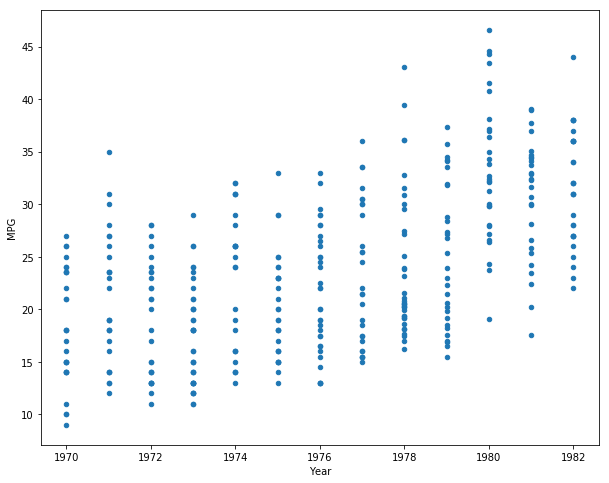

In [35]:
cars_data.plot.scatter(x='Year',
                     y='MPG',
                      figsize=(10,8))